Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

Read Dataset

In [2]:
df = pd.read_csv('Reviews.csv')
df = df[["Score","Text"]]

Analisis Dataset

In [3]:
df.dtypes

Score     int64
Text     object
dtype: object

EDA, terlihat bahwa data ini imbalanced

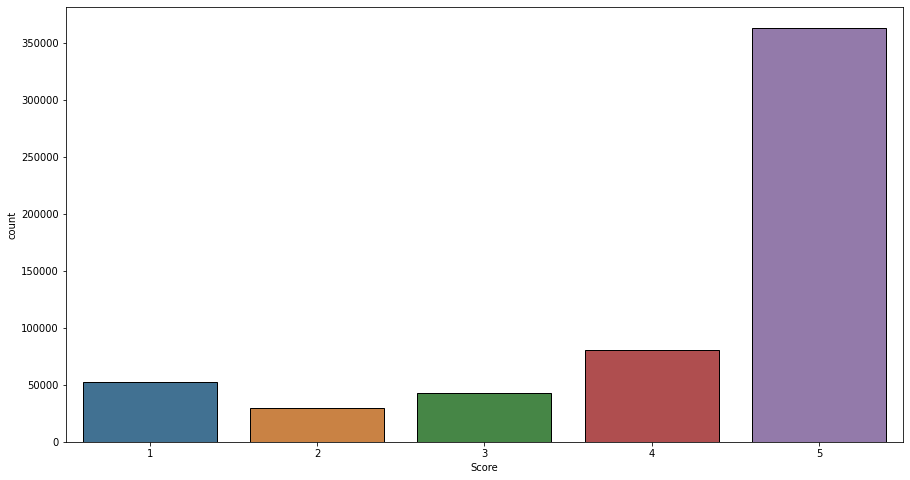

In [4]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

Drop Missing Value

In [5]:
df.isnull().sum()

Score    0
Text     0
dtype: int64

In [6]:
df = df.dropna()

Menghapus data dengan Score = 3, mengubah data dengan Score = 1 dan 2 menjadi 0 dan Score = 4 dan 5 menjadi 1

In [7]:
df = df[df['Score'] != 3]
df.Score[df.Score<3]=0
df.Score[df.Score>3]=1

C:\Users\yprik\AppData\Local\Temp\ipykernel_17928\2682808019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score>3]=1


Melihat EDA setelah mengubah data, terdapat imbalance

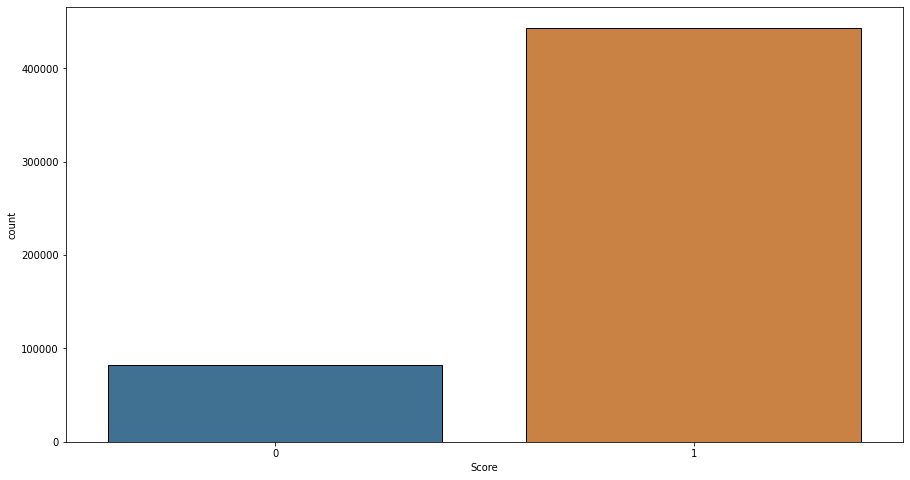

In [8]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

Handling imbalanced data

In [9]:
train_pos_df=df[df.Score==1][:5000]
train_neg_df=df[df.Score==0][:5000]

In [10]:
df=train_pos_df.append(train_neg_df)
df.shape

C:\Users\yprik\AppData\Local\Temp\ipykernel_17928\3899259543.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train_pos_df.append(train_neg_df)


(10000, 2)

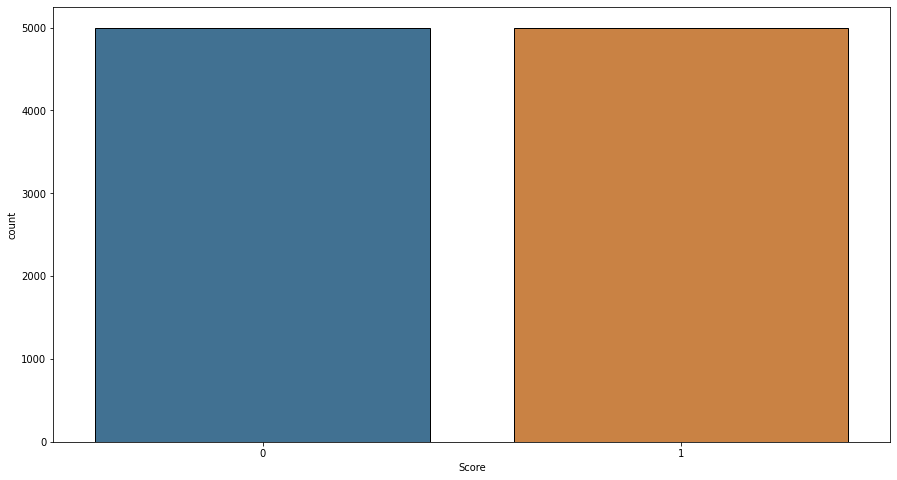

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

Convert "Summary" dari "object" ke "string"

In [12]:
df['Text'] = df['Text'].astype(str)

Text Cleaning

In [13]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [14]:
df['Text']=df['Text'].apply(text_cleaning)

In [15]:
df

,Score,Text
0,1,i have bought several of the vitality canned d...
2,1,this is a confection that has been around a fe...
4,1,great taffy at a great price there was a wid...
5,1,i got a wild hair for taffy and ordered this f...
6,1,this saltwater taffy had great flavors and was...
...,...,...
33795,0,the photo shows cinnamon and the write up desc...
33797,0,the item i received was not as pictured grant...
33802,0,i was looking forward to this one as a low car...
33803,0,i was greatly looking forward to an occasional...


Membuat variable x dan y

In [16]:
x = df['Text']
y = df['Score']

Split data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(ngram_range=(1,2),stop_words='english')
X_train_counts = count_vect.fit_transform(x_train) 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
lr=LogisticRegression(max_iter=100000)

In [19]:
from sklearn.metrics import accuracy_score
lr.fit(X_train_tfidf,y_train)
pred_1=lr.predict(X_test_tfidf)

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1012
           1       0.87      0.87      0.87       988

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion matrix, without normalization
[[879 133]
 [131 857]]


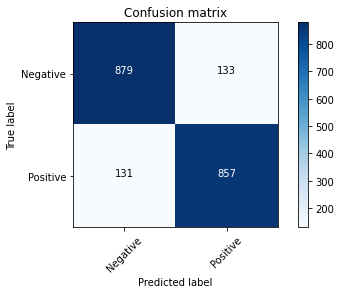

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_1)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'], normalize= False,  title='Confusion matrix')

In [22]:
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV

#
# Create the parameter grid
#
param_grid_lr = [{
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'),
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train_tfidf,y_train)

c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [23]:
predLR2 = gsLR.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1012
           1       0.88      0.89      0.88       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.88      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[888 124]
 [106 882]]


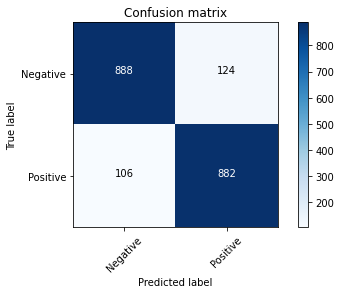

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_mulnb = naive_bayes.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1012
           1       0.89      0.88      0.88       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[904 108]
 [121 867]]


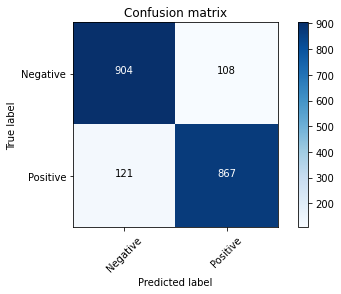

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mulnb)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_mulnb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [27]:
#
# Create the parameter grid
#
param_grid_nb = [{
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0)
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsNB = GridSearchCV(estimator=MultinomialNB(),
                     param_grid = param_grid_nb,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsNB = gsNB.fit(X_train_tfidf,y_train)

c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\yprik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

In [28]:
pred_mulnb2 = gsNB.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1012
           1       0.89      0.88      0.88       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[904 108]
 [121 867]]


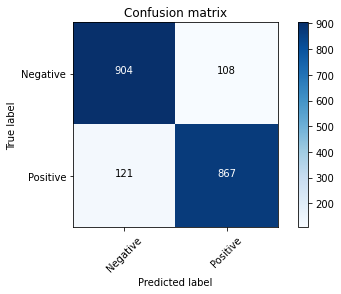

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mulnb2)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_mulnb2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Support Vector Machine

In [30]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear')
clf.fit(X_train_tfidf, y_train) 
predSVM = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1012
           1       0.88      0.90      0.89       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[888 124]
 [101 887]]


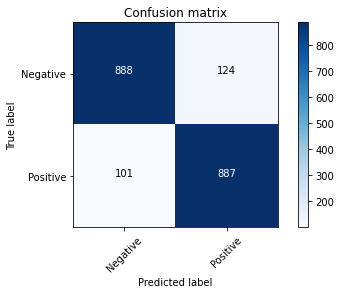

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM)
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [32]:
# from sklearn.preprocessing import StandardScaler
# pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [{
                    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'kernel': ['linear']
                  },
                 {
                    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'kernel': ['rbf']
                 }]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=SVC(random_state=1),
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train_tfidf, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=1,
             param_grid=[{'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [33]:
predSVM2 = gsSVC.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1012
           1       0.88      0.90      0.89       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[887 125]
 [102 886]]


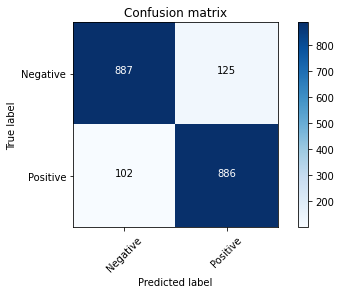

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Artificial Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
mlp.fit(X_train_tfidf, y_train)
predANN = mlp.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1012
           1       0.88      0.90      0.89       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[895 117]
 [ 96 892]]


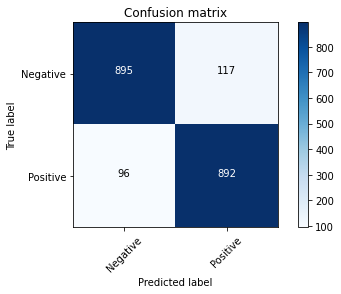

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN)
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [37]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000], 'random_state': [0],
                         'solver': ['lbfgs']})

In [38]:
predANN2 = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1012
           1       0.88      0.90      0.89       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion matrix, without normalization
[[889 123]
 [100 888]]


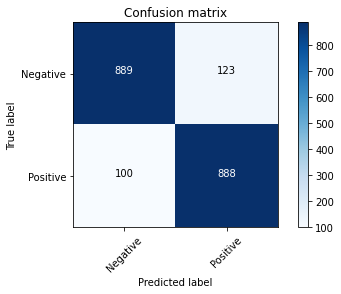

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [41]:
predrf = rf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1012
           1       0.84      0.88      0.86       988

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Confusion matrix, without normalization
[[848 164]
 [116 872]]


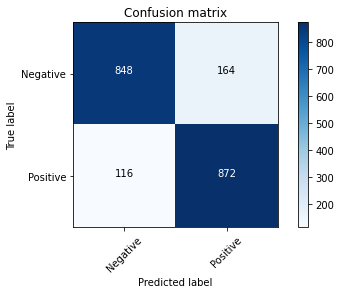

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [43]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12]
}
gsRF = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid = parameters,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
gsRF.fit(X_train_tfidf, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [320, 330, 340]},
             scoring='accuracy')

In [44]:
predrf2 = gsRF.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1012
           1       0.79      0.89      0.84       988

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

Confusion matrix, without normalization
[[776 236]
 [104 884]]


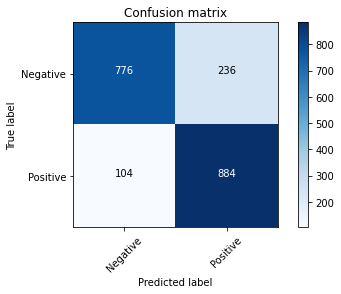

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Mendapatkan "Top 20 positive words" dan "Top 20 negative words" menggunakan Logistic Regression

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(x, y, tfidf_n, LogisticRegression())

# features: 243000
# train records: 7500
# test records: 2500
Model Accuracy: 0.8616

-Top 20 positive-
            Word  Coefficient
           great     7.814538
            love     5.287908
            best     5.232560
            good     4.253655
       delicious     4.153127
         perfect     3.275075
           loves     3.260072
       excellent     3.220285
        favorite     3.030087
            nice     2.972499
       wonderful     2.671439
           snack     2.616108
          highly     2.545936
            easy     2.519860
           tasty     2.447692
           chips     2.236332
highly recommend     2.206568
          stores     1.961567
            glad     1.960739
           thank     1.956238

-Top 20 negative-
        Word  Coefficient
         box    -2.092865
     product    -2.177191
       worst    -2.187047
       waste    -2.242237
       awful    -2.306528
    horrible    -2.343430
         toy    -2.359040
      return    -2.429015
        weak 

Menambahkan kolom "id"

In [1]:
import pandas as pd
import numpy as np
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
df = pd.read_csv('Reviews.csv')
df = df[["Score","Text"]]
df = df.sample(n=10000)
df['Text']=df['Text'].apply(text_cleaning)
df = df.dropna()
df["id"] = df.index + 1
df

,Score,Text,id
311882,5,i am french so i have known the michoko candie...,311883
284865,5,my cats love the taste of these chews and rega...,284866
409858,5,eaten dry out of the box these taste very sim...,409859
289799,2,my powdered cinnamon vanilla creamer was taken...,289800
420219,5,this is the first time i am using mcvities bra...,420220
...,...,...,...
492825,5,so wow this is a lot of tea i bought this ...,492826
21558,1,i made the mistake to give a greeny to my pupp...,21559
335278,1,stash premium tea has little to no taste depe...,335279
354125,3,decent selection of different kinds of coffeee...,354126


Mengimplementasikan Sentiment Intensity Analyzer dari VADERS (Sentiment Analysis)

In [2]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

import nltk
nltk.download('vader_lexicon')

In [3]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [4]:
vaders.head(20)

,id,neg,neu,pos,compound,Score,Text
0,311883,0.064,0.775,0.162,0.9194,5,i am french so i have known the michoko candie...
1,284866,0.000,0.758,0.242,0.8955,5,my cats love the taste of these chews and rega...
2,409859,0.034,0.617,0.349,0.9540,5,eaten dry out of the box these taste very sim...
3,289800,0.128,0.744,0.128,-0.0083,2,my powdered cinnamon vanilla creamer was taken...
4,420220,0.040,0.797,0.163,0.8186,5,this is the first time i am using mcvities bra...
5,246241,0.000,0.948,0.052,0.7684,2,i have been subscribing to this and other kind...
6,320143,0.000,0.680,0.320,0.8720,5,my husband can only have decaf coffee so this ...
7,284738,0.011,0.738,0.251,0.9965,4,our last cat spent his last few years with har...
8,306202,0.000,0.814,0.186,0.7501,5,by far barney s is the best almond butter i v...
9,349448,0.040,0.848,0.112,0.9442,4,let s face it changing names may be culturally...


Mengimplementasikan roBERTA-base model for Sentiment Analysis

pip install torch torchvision torchaudio

In [5]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [6]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [7]:
res = {}
df = df.sample(n=1000)
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 422536
Broke for id 98787
Broke for id 181323
Broke for id 171000
Broke for id 557522
Broke for id 97981
Broke for id 96835
Broke for id 220222
Broke for id 515089
Broke for id 87035
Broke for id 53314
Broke for id 257451
Broke for id 468434
Broke for id 103817
Broke for id 323191
Broke for id 565872


In [8]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [9]:
results_df.head(20)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Score,Text
0,203575,0.081,0.738,0.182,0.5719,0.631111,0.319856,0.049033,3,this product is like regular splenda but ther...
1,268048,0.186,0.766,0.047,-0.8555,0.667644,0.232178,0.100177,1,i must have gotten hold of a bad batch the o...
2,462216,0.000,0.766,0.234,0.8977,0.002389,0.018532,0.979079,5,these are the best pretzels on the market toda...
3,25769,0.000,0.776,0.224,0.9884,0.002997,0.012297,0.984705,5,i just wanted to say that i picked up my first...
4,219802,0.060,0.785,0.156,0.7884,0.157252,0.364032,0.478715,5,i ve used iams for years and even the crazy ca...
5,11914,0.028,0.890,0.082,0.5023,0.036601,0.377326,0.586073,5,i eat a cookie every morning for breakfast di...
6,20211,0.134,0.614,0.252,0.8225,0.572260,0.317291,0.110450,2,disappointing i went to a lot of trouble to b...
7,89897,0.040,0.817,0.143,0.9861,0.105547,0.531564,0.362890,4,my dog is picky she only eats deli turkey mea...
8,501294,0.035,0.789,0.176,0.9811,0.005099,0.034859,0.960042,5,my dogs eat the merrick canned food with fromm...
9,320082,0.054,0.767,0.178,0.7796,0.100193,0.282259,0.617549,5,purchasing starbucks via in these package con...
